# A sample of common supervised machine learning algorithms

In this notebook, we show the typical procedure of importing data, inspecting it and looking for flaws, before actually doing machine learning.

As usual we start by importing the required libraries.

In [98]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

We need a dataset to play around with. Sklearn has many options.

In [99]:
# The iris data set available from sklearn contains a number of samples of iris flowers of different species. 
iris = datasets.load_iris()

A description of the dataset can be called like below.

In [100]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

As you see, this data is measurements of flowering plants. The actual data can be accessed using `iris.data`. Data is represented as a matrix, where each row is a unique sample, and the columns represent features. By calling `X.shape` we see that this data set has 150 samples, with 4 features.

In [101]:
X = iris.data
y = iris.target
print(X.shape)

(150, 4)


The species is encoded as a number

In [102]:
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


**Tip**: Type "iris." into a code cell and press Tab, and a drop down menu will display all the different data fields. Most of these are meta data.

In [103]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

### Inspecting your data
Pandas is a wonderful framework for data exploration and visualization.

In [104]:
import pandas as pd
df = pd.DataFrame(X, columns = iris.feature_names)
df['species'] = y # add a column with the prediction target
df.head() # view the first 5 samples

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Check what data type each feature is using `df.dtypes`. These features are numerical, specifically 64 bit floating point (decimal) numbers (float64).

In [105]:
df.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
species                int32
dtype: object

This dataset is simple and cleaned, but in the real world, you are more likely to encounter "dirty" datasets, where certain samples have missing values, duplicates or simple typographical errors. Just as a practice, you should get a habit of calling `df.describe()`. Here you can look for outliers and more in the data. Further reading on dirty datasets can be found in the Pandas [documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html).

In [106]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


A good habit is to look for duplicates. Here we show how to do so. `df.duplicated()` is an array of boolean values whether the sample occurs multiple times in the dataset.

In [107]:
print(df.duplicated())

0      False
1      False
2      False
3      False
4      False
       ...  
145    False
146    False
147    False
148    False
149    False
Length: 150, dtype: bool


**Note**: this particular data set does not have very precise decimals, so the likelihood of some samples randomly being identical is relatively high. In fact, we have one false positive

In [108]:
# Check the dataset has duplicates:
np.any(df.duplicated().values)

True

In [109]:
# which is the ((false)) duplicate?
duplicates = df.duplicated()
df[duplicates]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
142,5.8,2.7,5.1,1.9,2


Removing the duplicate would be performed using `df.drop_duplicates`, but we will not need it here. NaN or N/A values represent missing or invalid feats of data. Similarly, we can look for these values using `df.isna()`.

In [110]:
np.any(df.isna().values)

False

`df.dropna()` removes the samples with nan-values from the dataset, and saves you the work of dealing with them. Another option is to fill in NaN-values with the group average for instance. This is done using `df.fillna()`.

### Now that you know some basics of data cleaning, lets visualize the data. We will limit ourselves to only 2 features.

In [114]:
X = iris.data[:, :2] # only use 2 features for visualization purposes
y = iris.target

Always start by plotting your data.

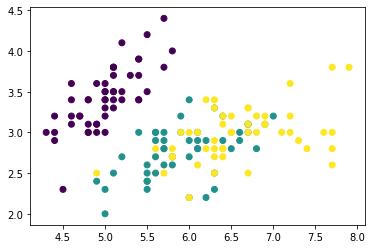

In [118]:
plt.figure()
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

Training a machine learning model in sklearn is surprisingly concise. The actual training phase is initiated by calling `clf.fit(X,y)`.

In [124]:
clf = neighbors.KNeighborsClassifier(n_neighbors=1)
clf.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

An interesting way to visualize the classifier is to look at its decision boundary.

In [127]:
def plot_decision_boundary(clf, X, y):
    """
    X : input data
    y : input labels
    clf : the sklearn classifier
    
    """
    h = .05 
    # Define some custom colors
    cmap_light = ListedColormap(['orange', 'pink', 'cornflowerblue'])
    cmap_bold = ListedColormap(['darkorange', 'red', 'darkblue'])
    
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

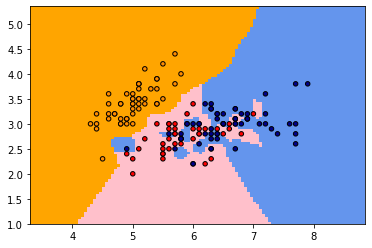

In [128]:
plot_decision_boundary(clf, X, y)
plt.show()

In KNN, the prediction depends on the number of neighbors. **Ex 1: Edit the code below to plot the decision boundary using 1, 11 and 21 neighbors. Explain what you observe**. Hint: write a loop.